## GAUSSIAN MIXTURE MODELS are basically composed of Expectation and Maximization step
### 1. Expectation Step in Multivariate Case
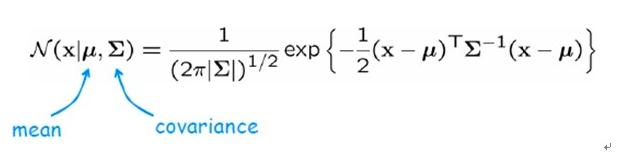

### 2. Expectation Step in Single Varibale Case
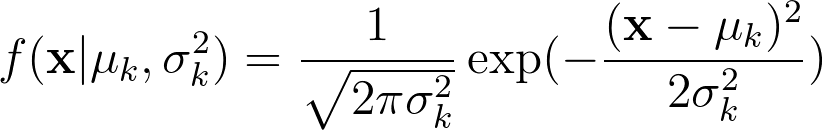

The only diffrence Between One and Multi Dimension data for GMM is instead of <font color='red'>Variance</font>

We capture <font color='red'> Covariance</font>

To learn what is Covariance [here](https://www.youtube.com/watch?v=WBlnwvjfMtQ)

In [161]:
class GMM():
    
    def __init__(self,data,k,epochs,eps=1e-8):
        # data
        self.X=data
        # number of clusters 
        self.k=k
        # list of likelihood
        self.likelihood =[]
        # expectation
        self.b =[]
        # epsilon
        self.eps=eps
        #epochs
        self.epochs=epochs
        
    
    def prob_density_function(self,data, mean, variance):
         # A normal continuous random variable.
        s1 = 1/(np.sqrt(2*np.pi*variance))
        s2 = np.exp(-(np.square(data - mean)/(2*variance)))
        return s1 * s2
    
    def fit(self): 
        
        weights = np.ones((self.k)) / self.k # ones array of each weight 1/k (here 1/3)
        means = np.random.choice(self.X, self.k)
        variances = np.random.random_sample(size=self.k)
        self.X=np.array(self.X)
        print("initially ",means,variances,"\n")
        
        ls_mean=[]
        ls_variance=[]
        # iterating throught the data
        for i in range(self.epochs):
            
            # calculate the maximum likelihood of each observation xi
            self.likelihood = []
            # Expectation step
            for j in range(self.k):
                self.likelihood.append(self.prob_density_function(self.X, means[j], np.sqrt(variances[j])))
            self.likelihood = np.array(self.likelihood)
            
            self.b = []
            
            
            # Maximization step 
            for j in range(self.k):
            
            # use the current values for the parameters to evaluate the posterior
            # probabilities of the data to have been generanted by each gaussian    
                self.b.append((self.likelihood[j] * weights[j]) / (np.sum([self.likelihood[i] * weights[i] for i in range(self.k)], axis=0)+self.eps))

                # updage mean and variance
                means[j] = np.sum(self.b[j] * self.X) / (np.sum(self.b[j]+self.eps))
                variances[j] = np.sum(self.b[j] * np.square(self.X - means[j])) / (np.sum(self.b[j]+self.eps))

                # update the weights
                weights[j] = np.mean(self.b[j])
             # storing means for each iteration   
            ls_mean.append(means.tolist())
            # storing variance for each iteration 
            ls_variance.append(variances.tolist())
#             print(f'after {i} epochs means is {means} and variance is {variances}')
        return ls_mean,ls_variance
#             print(f'after {i} epochs means is {means} and variance is {variances}')


     
    
## Generating my own 1d data
n_samples =100

# mu --> mean  and sigma ---> standard deviation

# define the number of points
n_samples = 100
mu1, sigma1 = -5, 1.2 # mean and variance
mu2, sigma2 = 5, 1.8 # mean and variance
mu3, sigma3 = 0, 1.6 # mean and variance

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

gaussain = GMM(data=X,k=3,epochs=15,eps=1e-7)
mean,variance = gaussain.fit()
        
        

Dataset shape: (300,)
initially  [-5.29908696 -4.88724168 -2.25448289] [0.78700799 0.3781514  0.54445358] 



In [162]:
mean

[[-5.447911687806895, -4.951896946876751, -0.5550162097775722],
 [-5.391387238156239, -4.852843508515019, 1.5730825573084812],
 [-5.303079891428191, -4.648157774798244, 2.5189544997806244],
 [-5.265546765946115, -4.390236896785014, 2.697618361752606],
 [-5.322051025897019, -4.119717090722412, 2.835451824440251],
 [-5.428595347859782, -3.8018603055540767, 2.9787518465034166],
 [-5.519339495708541, -3.419554700391987, 3.1583608286991893],
 [-5.547176671221818, -2.973874323953654, 3.3937667105372413],
 [-5.504520343889167, -2.4791721712158856, 3.67729030856226],
 [-5.409892953408194, -1.9426131815331689, 3.984337580974629],
 [-5.293001175054609, -1.3931250711594054, 4.314744514749055],
 [-5.1851869896880185, -0.9321227155425464, 4.635336386158243],
 [-5.102586930070997, -0.6256510057762783, 4.876354196388706],
 [-5.043216069762877, -0.434073681206713, 5.033373234897915],
 [-5.002003982042112, -0.31250361535637, 5.132054434612007]]

### choose iteration number 

1. select to see gaussian mixture working
    1. First select iteratio number =0
    
    and then select iteration number =14 (last epoch) ( This will be a fitted graph)

[]

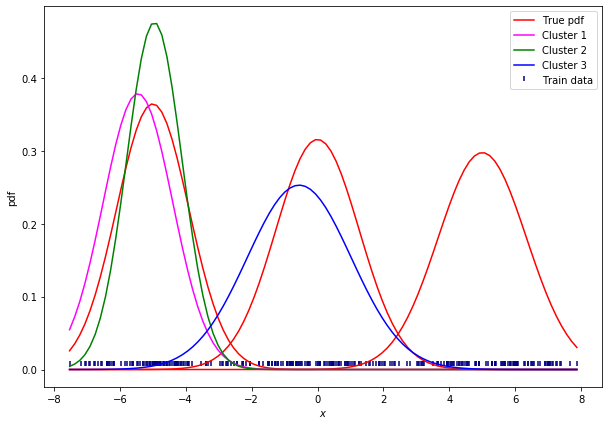

In [163]:

iteration_no=0

# Graph at begining
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, gaussain.prob_density_function(bins, mu1,sigma1), color='red', label="True pdf")
plt.plot(bins, gaussain.prob_density_function(bins,  mu2, sigma2), color='red')
plt.plot(bins, gaussain.prob_density_function(bins,mu3 , sigma3), color='red')


plt.plot(bins, gaussain.prob_density_function(bins, mean[iteration_no][0],variance[iteration_no][0] ), color='magenta', label="Cluster 1")
plt.plot(bins, gaussain.prob_density_function(bins,  mean[iteration_no][1], variance[iteration_no][1]), color='green',label='Cluster 2')
plt.plot(bins, gaussain.prob_density_function(bins, mean[iteration_no][2] , variance[iteration_no][2]), color='blue',label='Cluster 3')


plt.legend()
plt.plot()

##### Below is code which does not follow oops

In [164]:

# def prob_density_function(data, mean, variance):
#      # A normal continuous random variable.
#     s1 = 1/(np.sqrt(2*np.pi*variance))
#     s2 = np.exp(-(np.square(data - mean)/(2*variance)))
#     return s1 * s2


In [170]:
# import numpy as np
# import pandas as pd
# import math
# import matplotlib.pyplot as plt

# ## Generating my own 1d data
# n_samples =100

# # mu --> mean  and sigma ---> standard deviation

# # define the number of points
# n_samples = 100
# mu1, sigma1 = -4, 1.2 # mean and variance
# mu2, sigma2 = 4, 1.8 # mean and variance
# mu3, sigma3 = 0, 1.6 # mean and variance

# x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
# x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
# x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

# X = np.array(list(x1) + list(x2) + list(x3))
# np.random.shuffle(X)
# print("Dataset shape:", X.shape)

In [171]:
# # visualize the training data


# bins = np.linspace(np.min(X),np.max(X),100)

# plt.figure(figsize=(10,7))
# plt.xlabel("$x$")
# plt.ylabel("pdf")
# plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

# plt.plot(bins, prob_density_function(bins, mu1, sigma1), color='red', label="True pdf")
# plt.plot(bins, prob_density_function(bins, mu2, sigma2), color='red')
# plt.plot(bins, prob_density_function(bins, mu3, sigma3), color='red')

# plt.legend()
# plt.plot()

In [172]:
# # define the number of clusters to be learned
# k = 3
# weights = np.ones((k)) / k
# means = np.random.choice(X, k)
# variances = np.random.random_sample(size=k)
# print(means, variances)

In [173]:
# X = np.array(X)

In [174]:
# eps=1e-8
# for step in range(20):
    
#     if step % 5 == 0:
        
#         plt.figure(figsize=(10,6))
#         axes = plt.gca()
#         plt.xlabel("$x$")
#         plt.ylabel("pdf")
#         plt.title("Iteration {}".format(step))
#         plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

#         plt.plot(bins, prob_density_function(bins, mu1, sigma1), color='grey', label="True pdf")
#         plt.plot(bins, prob_density_function(bins, mu2, sigma2), color='grey')
#         plt.plot(bins, prob_density_function(bins, mu3, sigma3), color='grey')

#         plt.plot(bins, prob_density_function(bins, means[0], variances[0]), color='blue', label="Cluster 1")
#         plt.plot(bins, prob_density_function(bins, means[1], variances[1]), color='green', label="Cluster 2")
#         plt.plot(bins, prob_density_function(bins, means[2], variances[2]), color='magenta', label="Cluster 3")

#         plt.legend(loc='upper left')


#         plt.show()
    
#     # calculate the maximum likelihood of each observation xi
#     likelihood = []
#     # Expectation step
#     for j in range(k):
#         likelihood.append(prob_density_function(X, means[j], np.sqrt(variances[j])))
#     likelihood = np.array(likelihood)
    
#     b = []
#   # Maximization step 
#     for j in range(k):
        
#     # use the current values for the parameters to evaluate the posterior
#     # probabilities of the data to have been generanted by each gaussian    
#         b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
  
#         # updage mean and variance
#         means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
#         variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))

#         # update the weights
#         weights[j] = np.mean(b[j])